## linear regression I

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import time
import matplotlib.pyplot as plt
import sys
sys.path.append("../data")
#from mylib import *

Linear regression:
    $$Y = X^\top\beta + \epsilon, $$
where $\beta\in\mathbb{R}^p$ is an unknown parameters and $\epsilon$ is a random error.
- what is the assumption for $\epsilon$?
- Other assumptions?

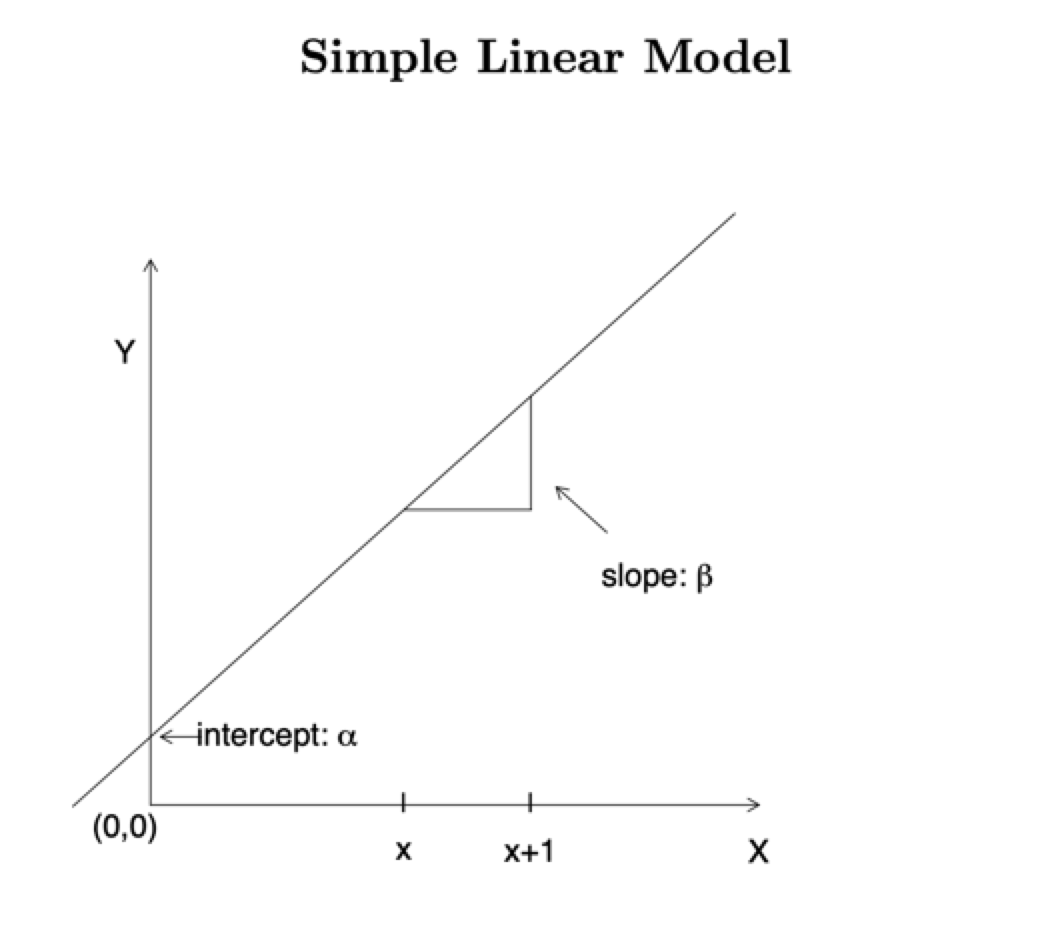

### MPG data

<font style='font-size:20px; line-height:26px;'>

Here is a plot showing the relation between vehicle's MPG (Miles Per Gallon) and its weight:

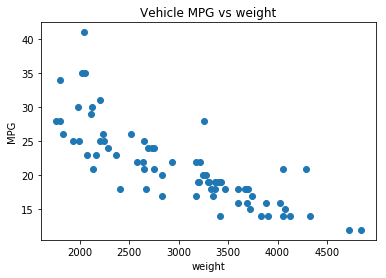

We natually concluded from the downward slopping points that "the heavier the vehicle is, the worse the MPG". If we want to be more precisely, we need to use a regression analysis. In this case it is a single variable regression:

$$ y_i=\alpha +\beta x_i+\epsilon_i $$

where $y_i$ is the observed MPG of a vehicle, and $x_i$ is the weight of the vehicle. We open use the LHS and RHS to distinguash the Y and X, or dependent variable (y) and regressors (X)

More generally, we should consider the MPG is not only determined by the wieght, but also by other design factors: length, displacement (排气量）， headroom (车厢净高）..., we can use a multivariate-linear-gression:

$$ y_i=\alpha +\beta_1 x_{1i}+\beta_2 x_{2i}+...+\beta_k x_{ki}+\epsilon_i   \quad \quad i=1,2,..,n$$

In the matrix form. this is

$$ \left[ \begin{array} {}y_1\\y_2\\.\\.\\y_n \end{array} \right]=\left[ \begin{array} {} 1 & x_{11} &. . .& x_{1k} \\1 & x_{21}&. . .& x_{2k} \\. & .& ... & . \\. & .& ...& . \\1 & x_{n1} &. . .& x_{nk} \\ \end{array} \right] \left[ \begin{array} {}\alpha \\ \beta_1 \\. \\ \beta_k \end{array} \right] + \left[ \begin{array} {}\epsilon_1\\\epsilon_2\\.\\.\\\epsilon_n \end{array} \right]$$

or

$$Y=X\beta+\epsilon$$

The $\beta $ should be selected such that the sum of error squared is to be minimized

$$ J=\sum_{i=1}^{n} (y_i-X_i^\top\beta)^2 $$

In matrix notation, 

$$ J=(Y-X\beta)'(Y-X\beta) =Y'Y-2(X\beta)'Y+(X\beta)'(X\beta)$$

then 

$$ \frac{\partial J}{\partial \beta}=-2X'Y+2(X\beta)'X $$

solve it at $\frac{\partial J}{\partial \beta}=0$ we have 

$$ \hat{\beta}= (X'X)^{-1}X'Y $$

We call X the information matrix. 
</font>
Question: How about other loss function?

### Analysing auto file

In [2]:
## here is the dataset
#df=pd.read_csv('auto.csv') 
df=pd.read_stata('/Users/dongwenou/Downloads/Intro to DS/auto.dta') 
df

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
69,VW Dasher,7140,23,4.0,2.5,12,2160,172,36,97,3.74,Foreign
70,VW Diesel,5397,41,5.0,3.0,15,2040,155,35,90,3.78,Foreign
71,VW Rabbit,4697,25,4.0,3.0,15,1930,155,35,89,3.78,Foreign
72,VW Scirocco,6850,25,4.0,2.0,16,1990,156,36,97,3.78,Foreign


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,74.0,6165.256757,2949.495885,3291.00,4220.25,5006.500,6332.2500,15906.00
mpg,74.0,21.297297,5.785503,12.00,18.00,20.000,24.7500,41.00
rep78,69.0,3.405797,0.989932,1.00,3.00,3.000,4.0000,5.00
headroom,74.0,2.993243,0.845995,1.50,2.50,3.000,3.5000,5.00
trunk,74.0,13.756757,4.277404,5.00,10.25,14.000,16.7500,23.00
weight,74.0,3019.459459,777.193567,1760.00,2250.00,3190.000,3600.0000,4840.00
length,74.0,187.932432,22.266340,142.00,170.00,192.500,203.7500,233.00
turn,74.0,39.648649,4.399354,31.00,36.00,40.000,43.0000,51.00
displacement,74.0,197.297297,91.837219,79.00,119.00,196.000,245.2500,425.00
gear_ratio,74.0,3.014865,0.456287,2.19,2.73,2.955,3.3525,3.89


<font style='font-size:20px; line-height:26px;'>
    
Some variable in this dataset need more clearification: 

- rep78 measures a car's repair record in 1978, it is a categorical variable, rangeing from 1 to 5
- foreigh  label for welther the model is foreign made of US made
- displacement	commonly used to measure the power of engine

</font>

### Estimation

In [4]:
def ols(y, X1):
    XX=X1.T.dot(X1)
    XY=X1.T.dot(y)
    Coef=np.matrix(XX).I.dot(XY) #.I是逆矩阵命令
    return Coef.tolist()[0]

#Coef 是一个二维矩阵对象，即使它只包含一行数据。
#.tolist() 将其转换为嵌套的二维 Python 列表。
#[0] 提取第一行，将其转换为一维列表形式。

nobs=df.shape[0]
y=df.mpg
df['one']=np.ones(nobs)
X1=df[['one','weight']]

betahat=ols(y, X1)
print(betahat)

[39.440283530718084, -0.006008686811999345]


### Confidence interval (CI)
For simple linear regression $$Y = \beta_0 + \beta_1 x + \epsilon.$$

#### 1. CI under normality assumption

We can write 
$$\hat{\beta}_1 = \sum_{i=1}^{n}c_i Y_i,$$
where $$ c_i = \frac{X_i-\bar{X}}{\sum_{i=1}^{n}(X_i-\bar{X})^2}.$$
Then
$$\hat{\beta}_1\sim N(\sum_{i=1}^n c_i(\beta_0 + \beta_1 X_i),\sigma^2\sum_{i=1}^n c_i^2).$$

$(1-\alpha)\%$ CI of $\beta_1$ is 
$$[\hat{\beta}-t_{n,1-\alpha/2}\sqrt{\hat{\sigma}^2/\sum_i(X_i-\bar{X})^2},\hat{\beta}+t_{n,1-\alpha/2}\sqrt{\hat{\sigma}^2/\sum_i(X_i-\bar{X})^2}],$$
where $t_{n-2,1-\alpha/2}$ is the $1-\alpha/2$ quantile of t-distribution with $df=n-2$ and 
 $$\hat{\sigma}^2 = \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{n-2}$$

#### 2. CI via bootstrap

2.1 Empirical Bootstrap

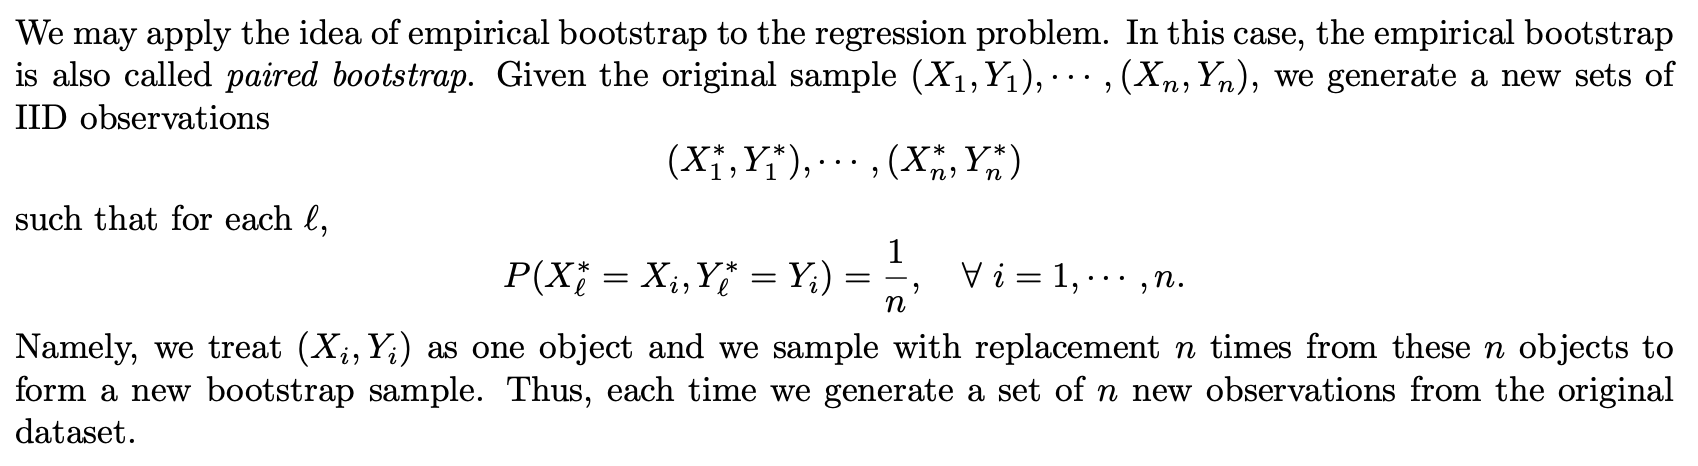

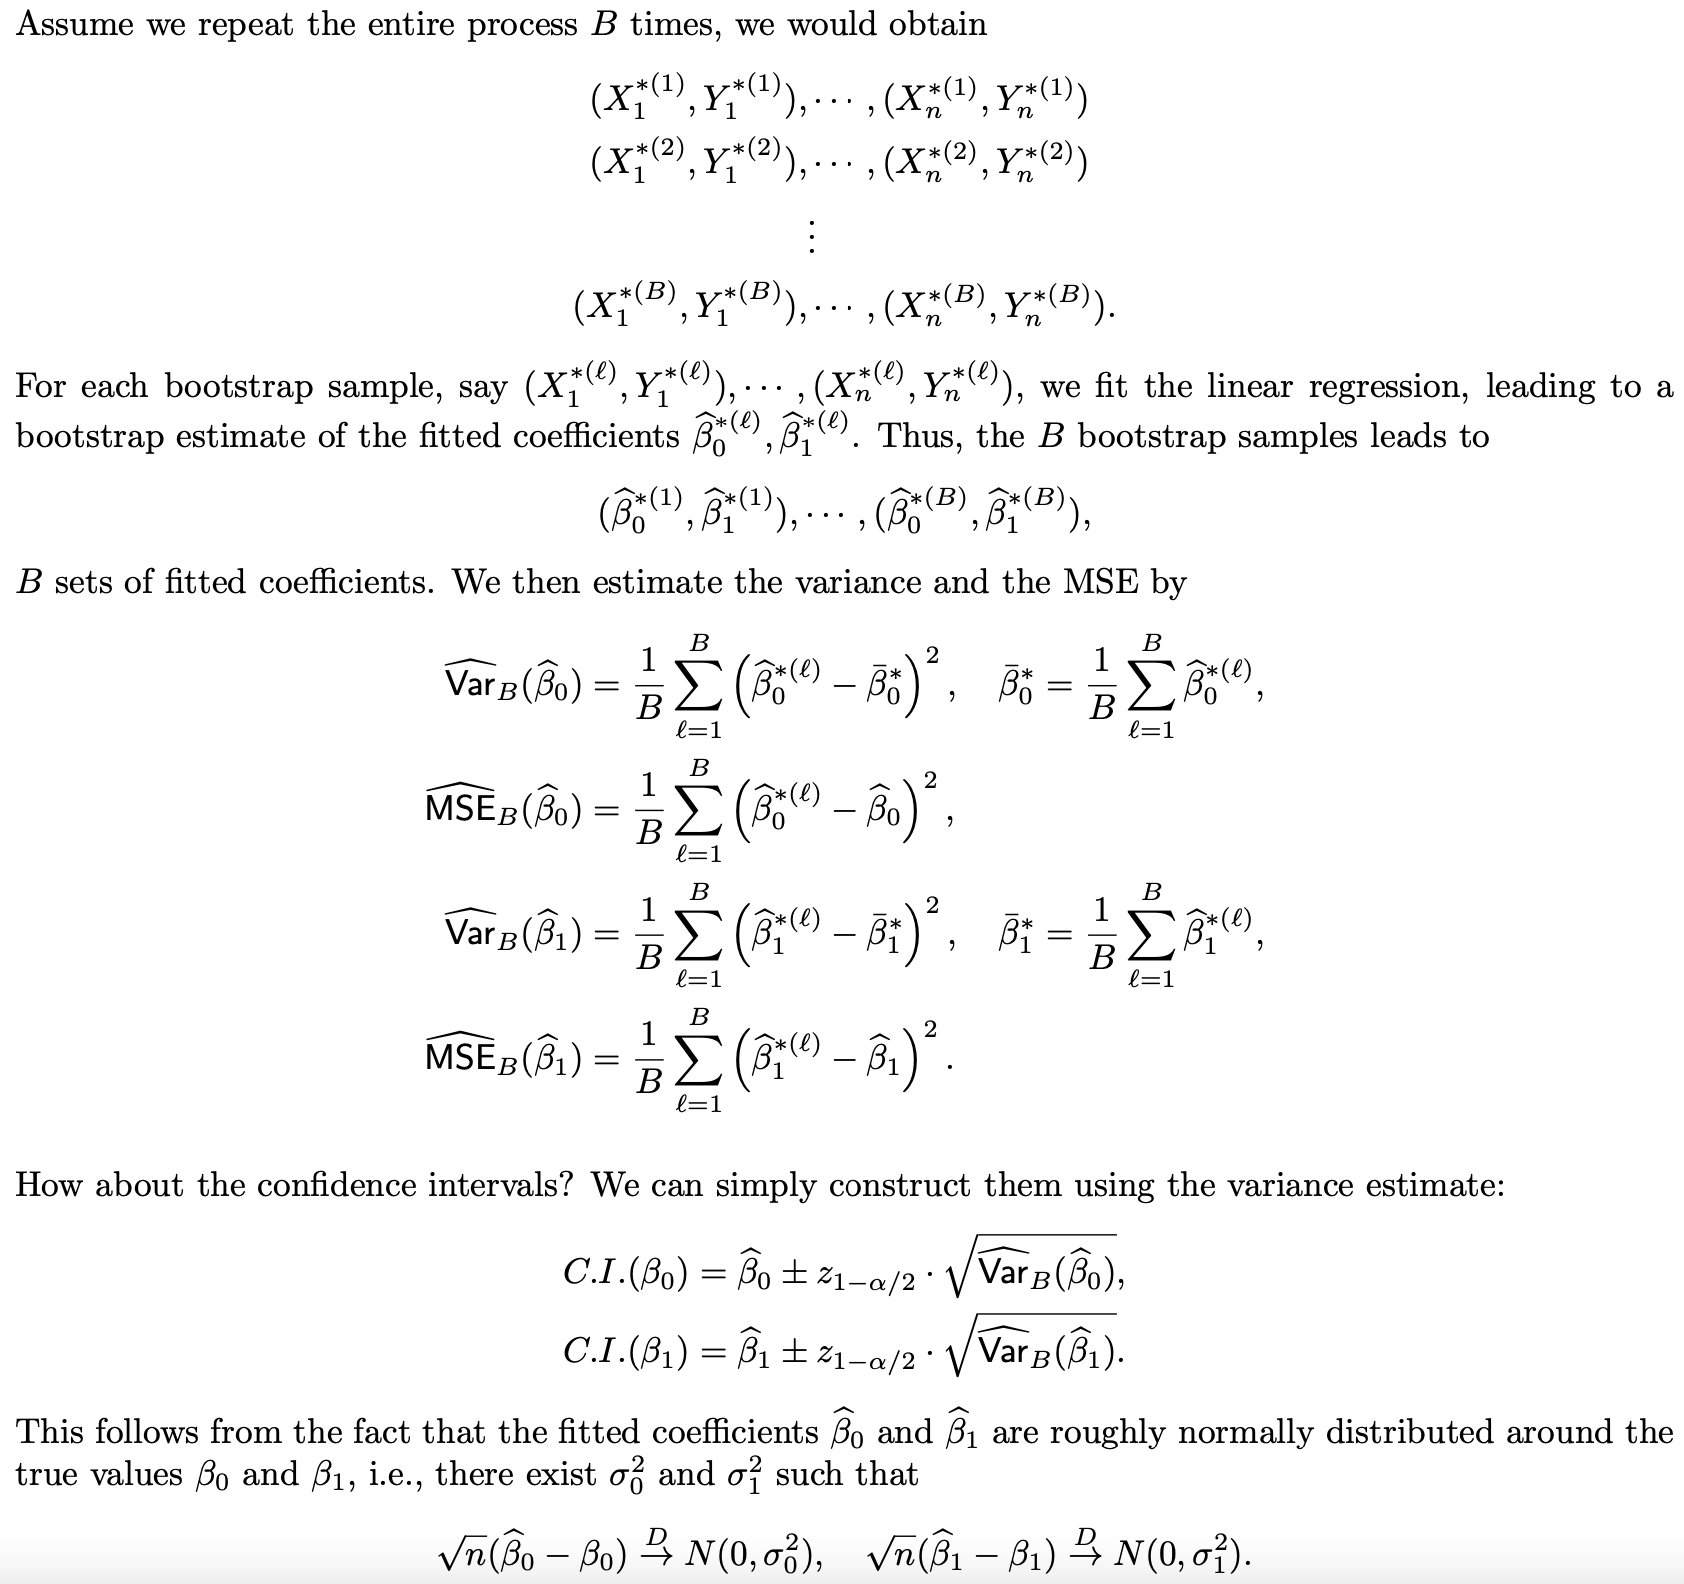

$\beta_0$ hat 为不bootstrap算出来的那个

2.2 Residual Bootstrap

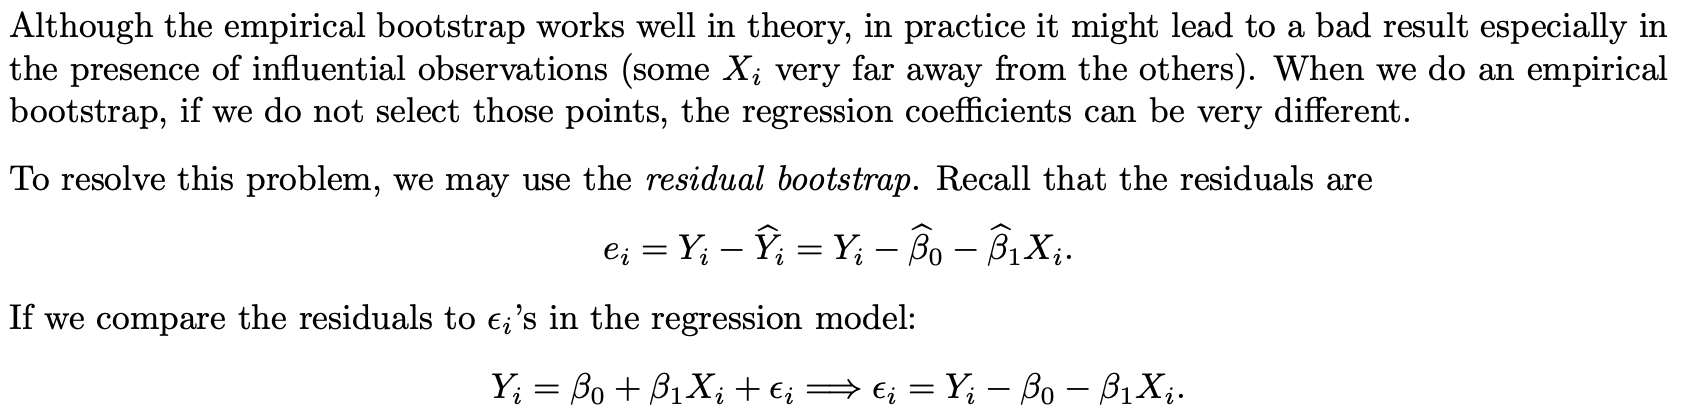

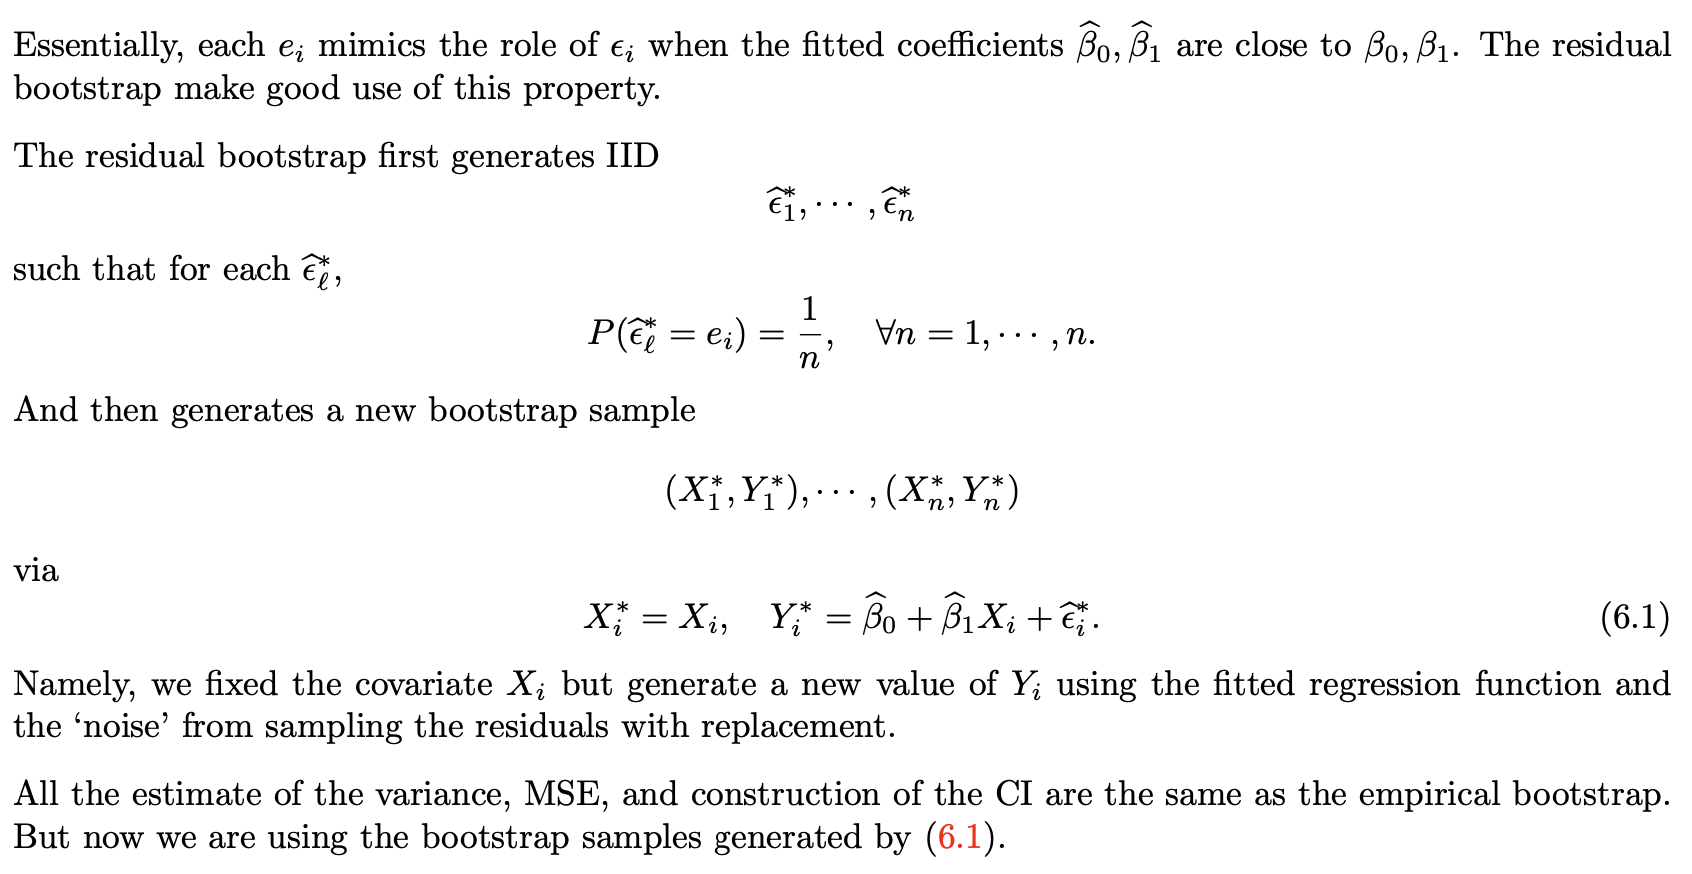

2.3 Wild Bootstrap

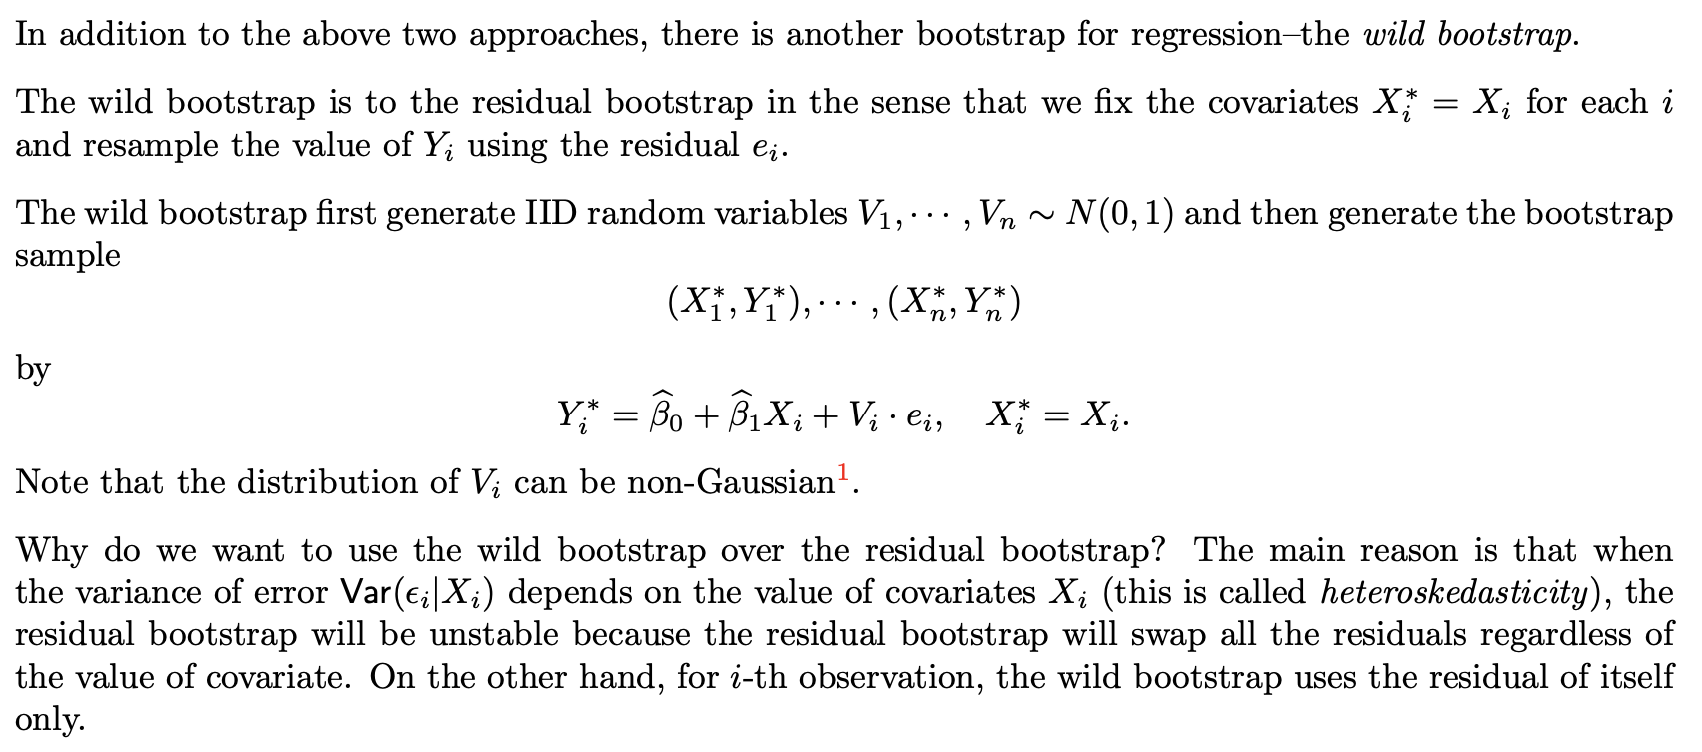

Homework:

(Case 1) $Y = 2.0 + 1.0X + \epsilon, X\sim uniform(-1,1),\epsilon\sim 0.2N(0,1)$

(Case 2)$Y = 2.0 + 1.0X + \epsilon, X\sim 0.95N(1,0.5) + 0.05N(5,0.2),\epsilon\sim 0.2N(0,1)$

(Case 3) $Y = 2.0 + 1.0X + \epsilon, X\sim uniform(-1,1),\epsilon\sim 0.2X^2*N(0,1)$

- Write a class for the four methods above.
- Do $K=1000$ simulations with sample size $n=500$ for each case, and get 95\% confidence intervals of $\beta_1=1.0$ by four methods above.  Calculte average length of the confidence intervals and coverage probability.
- Show all results in a table.
- Draw your conclusions.

### Prediction

In [30]:
print(X1)
#print(betahat)
for t in zip(X1, betahat):
    print(t[0],t[1])
    print(X1[t[0]])

    one  weight
0   1.0    2930
1   1.0    3350
2   1.0    2640
3   1.0    3250
4   1.0    4080
..  ...     ...
69  1.0    2160
70  1.0    2040
71  1.0    1930
72  1.0    1990
73  1.0    3170

[74 rows x 2 columns]
one 39.440283530718084
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
69    1.0
70    1.0
71    1.0
72    1.0
73    1.0
Name: one, Length: 74, dtype: float64
weight -0.006008686811999345
0     2930
1     3350
2     2640
3     3250
4     4080
      ... 
69    2160
70    2040
71    1930
72    1990
73    3170
Name: weight, Length: 74, dtype: int16


('one', 39.440283530718084)
('weight', -0.006008686811999345)
0     21.834831
1     19.311183
2     23.577350
3     19.912051
4     14.924841
        ...    
69    26.461520
70    27.182562
71    27.843518
72    27.482997
73    20.392746
Name: one, Length: 74, dtype: float64


Text(0, 0.5, 'MPG')

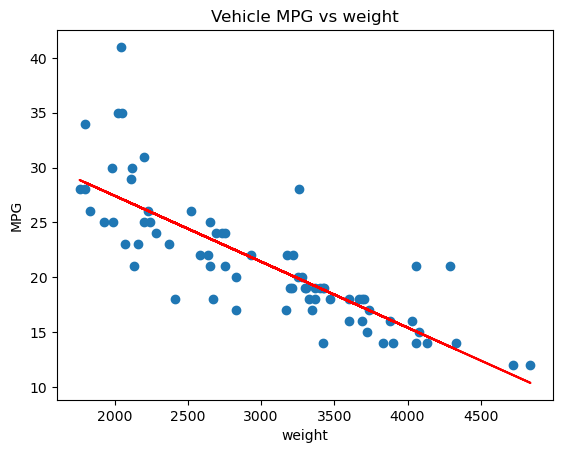

In [24]:
def getYhat(X,betas):
    yhat=np.zeros(X.shape[0])
    #print(X)
    #print('----',type(X))
    for t in zip(X, betas):
        #print(type(t))
        v,beta = t[0],t[1]
        print(t)
        yhat+=X[v]*beta
    return yhat
    
yhat=getYhat(X1,betahat)
print(yhat)
_=plt.scatter(df.weight, df.mpg)
plt.title("Vehicle MPG vs weight")
plt.plot(df.weight, yhat, c='red')
plt.xlabel("weight")
plt.ylabel("MPG")

In [15]:
import numpy as np

# 创建示例数据
X = np.random.rand(74, 2)  # 74行2列的矩阵
betas = np.array([0.5, 1.0])  # 长度为2的系数向量

# 使用 zip 将 X 的列与 betas 中的系数配对
for t in zip(X, betas):
    v, beta = t[0], t[1]  # v 是 X 的一列，beta 是对应的系数
    print(f"v: {v}, beta: {beta}")  # 打印每列的前5个元素和对应的系数


v: [0.75560038 0.46496929], beta: 0.5
v: [0.75979656 0.96827406], beta: 1.0


# plot of $(Y_i,\hat{Y_i})$

('one', 39.440283530718034)
('weight', -0.006008686811999342)
9.322415424577096 45.55555555555556


Text(0.5, 0, 'MPG')

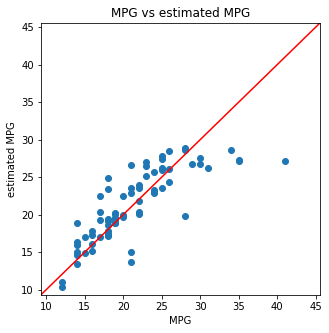

In [28]:
# $Y_i$ v.s. $\hat{Y}_i$
yhat=getYhat(X1,betahat)
ymin=min(np.min(y), np.min(yhat))*0.9
ymax=max(np.max(y), np.max(yhat))/0.9
print(ymin,ymax)
plt.subplots(figsize=(5,5))
_=plt.scatter(y, yhat)
plt.title("MPG vs estimated MPG")
plt.xlim(ymin, ymax)
plt.ylim(ymin, ymax)
plt.plot([ymin,ymax], [ymin,ymax], c='red')
plt.ylabel("estimated MPG")
plt.xlabel("MPG")

#[ymin, ymax]：
#表示两个点的 x 轴坐标和 y 轴坐标。
#这两个点分别是 (ymin, ymin) 和 (ymax, ymax)，即对角线的 起点和 终点。

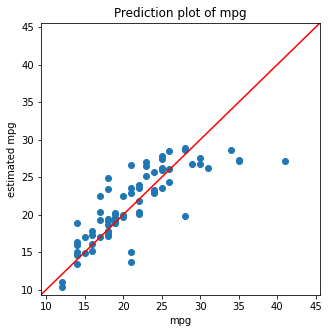

In [29]:
def predictPlot(y, yhat):
    ymin=min(np.min(y), np.min(yhat))*0.9
    ymax=max(np.max(y), np.max(yhat))/0.9
    plt.subplots(figsize=(5,5))
    _=plt.scatter(y, yhat)
    plt.title('Prediction plot of '+y.name)
    plt.xlim(ymin, ymax)
    plt.ylim(ymin, ymax)
    plt.plot([ymin,ymax], [ymin,ymax], c='red')
    plt.ylabel("estimated "+y.name)
    plt.xlabel(y.name)

predictPlot(y,yhat)

### Multivariate linear regression  


In [8]:
df.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,one
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic,1.0
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic,1.0
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic,1.0
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic,1.0
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic,1.0


In [30]:
rhs=['one','weight','length', 'displacement', 'headroom', 'trunk']
X1=df[rhs]
betahat=ols(y, X1)
print(betahat)

[47.68965568028398, -0.004394318904708205, -0.07169413358609944, 0.004369364899044381, -0.0160676833760931, -0.033743933348858945]


('one', 47.68965568028398)
('weight', -0.004394318904708205)
('length', -0.07169413358609944)
('displacement', 0.004369364899044381)
('headroom', -0.0160676833760931)
('trunk', -0.033743933348858945)


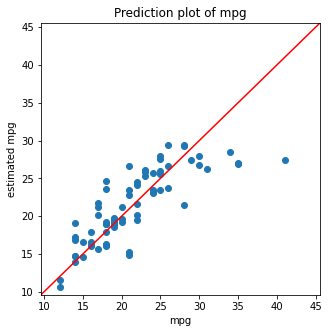

In [31]:
yhat=getYhat(X1,betahat)
predictPlot(y,yhat)

### How good is the fit?

<font style='font-size:18px; line-height:24px;'>
The goodness of fit, $R^2$ is the overall measurement for how good the variations of the dependent variable is explained by the model. It is derived from identity

$$\sum_{i=1}^n (Y_i−\bar{Y})^2 =\sum_{i=1}^n (\hat{Y}_i-\bar{\hat{Y}})^2 +\sum_{i=1}^n\hat{\epsilon}_i^2,$$

where $\hat{\epsilon}_i=Y_i-\hat{Y}_i.$ We denote it as  $SST=SSE+SSR$, or 

$\quad\quad\quad\quad\quad$ Sum of Squared Total = Sum of Squared Explained + Sum of Squared Residuals

divived the bothside by SST, we have 

$$1=\frac{SSE}{SST}+\frac {SSR}{SST}$$

thus $R^2$ is defined as 

$$  R^2=\frac{SSE}{SST}=1-\frac {SSR}{SST}$$

Goodness of fit is also be referenced as "coefficient of determination".
</font>



In [34]:
def OLS(y, X1, toPrint=False):
    XX=X1.T.dot(X1)
    XY=X1.T.dot(y)
    Coef = (np.matrix(XX).I.dot(XY)).tolist()[0]
    yhat = getYhat(X1,Coef)
    ymean=np.mean(y)
    SST=(y-ymean).dot(y-ymean)
    yhatmean=np.mean(yhat)
    SSE=(yhat-yhatmean).dot(yhat-yhatmean)
    R2=SSE/SST
    if toPrint:
        print('nObs'.ljust(10), str(X1.shape[0]).rjust(10))
        print('SST'.ljust(10), ('%.3f' %SST).rjust(10))
        print('SSE'.ljust(10), ('%.3f' %SSE).rjust(10))
        print('R2'.ljust(10), ('%.3f' %R2).rjust(10))  
        print('-------------------------------')
        for v, beta in zip(X1, Coef):
            print(v.ljust(12), ('%.4f' % beta).rjust(16))
        print('-------------------------------')
    return Coef,SST,SSE,R2,yhat
_=OLS(y, X1, True)

('one', 47.68965568028398)
('weight', -0.004394318904708205)
('length', -0.07169413358609944)
('displacement', 0.004369364899044381)
('headroom', -0.0160676833760931)
('trunk', -0.033743933348858945)
nObs               74
SST          2443.459
SSE          1619.032
R2              0.663
-------------------------------
one                   47.6897
weight                -0.0044
length                -0.0717
displacement           0.0044
headroom              -0.0161
trunk                 -0.0337
-------------------------------


Can you write a class for linear regression?

In [31]:
# Homework
fit = lm()
fit.linear_fit(Y~X)
fit.coef
fir.r_squre
fit.plot
fit.SST
fit.CI
fit.residual_sd
fit.predict(x_new)
fit.vanilla_boot
fit.residual_boot
fit.wild_boot

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3693895985.py, line 3)